In [15]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

import requests
import pandas as pd
import dns
from urllib.request import urlopen
import json

pd.options.display.max_columns=100

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

import time

from sklearn.preprocessing      import MinMaxScaler
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import StandardScaler

from sklearn.cluster            import KMeans



In [10]:
my_file='data_model_cp.csv'
df=pd.read_csv(my_file)

In [11]:
df.drop(columns='Unnamed: 0', inplace=True)

In [14]:
df.sample(10)

,cp,comercio,servicios,salones,escuelas,reparacion,cafe,trabajadores,farmacias,alquiler,centros,asociaciones,casas,cerrajerias,agrupaciones,lavanderias,lavado,laboratorios,bares,panaderias,hojalateria,guarderias,consultorios,actividades,purificacion,cajas,banca,diseno,operadores,sanitarios,bufetes,elaboracion,estacionamientos,hospitales,sociedades,administracion,clinicas,agencias,hoteles,transporte,imparticion,promotores,billares,regulacion,bibliotecas,venta,montepios,fabricacion,notarias,de_sistemas,godinez,contadores,comida,comida_corrida,tacos_tortas
20181,86461,1,0,0,0,0,0,30,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0
1885,20354,20,0,0,0,0,0,200,0,0,0,2,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,2,0,0
17486,76815,4,1,0,0,0,0,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0
693,6699,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
23895,99055,12,0,2,1,1,1,185,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,24,0,2,1,0
11426,55238,211,13,17,6,18,7,2025,3,0,1,4,4,2,2,9,1,0,2,7,1,0,2,0,4,0,0,1,0,3,0,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9,0,0,344,0,35,0,9
1586,15580,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6589,36923,2,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
18294,79530,2,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
8433,43070,49,7,0,4,2,0,920,3,1,0,2,0,0,0,0,0,0,1,7,0,0,1,8,1,0,0,0,0,0,0,6,0,0,0,13,1,0,0,0,3,1,0,4,1,0,0,1,0,0,121,0,8,0,2


In [21]:
X = df.drop(columns = ['tacos_tortas'])
y = df['tacos_tortas']

In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
24052    0
24053    3
24054    0
24055    0
24056    1
Name: tacos_tortas, Length: 24057, dtype: int64

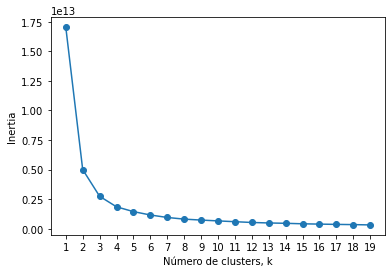

In [25]:
#determine the number of groups
inertias =  {
                k: KMeans(n_clusters=k).fit(X).inertia_ for k in range(1, 20)
            }

plt.plot(list(inertias.keys()), 
         list(inertias.values()), '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inertia')
plt.xticks(list(inertias.keys()))
plt.show()

In [26]:
model = KMeans(n_clusters=3)

In [27]:
model.fit(X)

KMeans(n_clusters=3)

In [28]:
labels = model.predict(X)

In [29]:
df['cluster'] = labels

In [30]:
df.head()

,cp,comercio,servicios,salones,escuelas,reparacion,cafe,trabajadores,farmacias,alquiler,centros,asociaciones,casas,cerrajerias,agrupaciones,lavanderias,lavado,laboratorios,bares,panaderias,hojalateria,guarderias,consultorios,actividades,purificacion,cajas,banca,diseno,operadores,sanitarios,bufetes,elaboracion,estacionamientos,hospitales,sociedades,administracion,clinicas,agencias,hoteles,transporte,imparticion,promotores,billares,regulacion,bibliotecas,venta,montepios,fabricacion,notarias,de_sistemas,godinez,contadores,comida,comida_corrida,tacos_tortas,cluster
0,121,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
1,384,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
2,445,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
3,465,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
4,500,1,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2


In [33]:
pd.pivot_table(df, index='cluster', aggfunc=[sum]).to_csv('pivote.csv')

### Perfilamiento

cluester 0 = godinez para reparadores	

cluester 1 = godinez para comerciantes

cluester 2 = godinez para de servicio

